<h1 style=text-align:center;color:brown;font:bold> Data PreProcessing </h1>

## Divided into 6 parts
    * Common Data preparation tasks
    * Data Cleaning
    * Feature Selection
    * Data Transformation
    * Feature engineering
    * Dimensionality Reduction

<h1 style=text-align:center;color:blue;font:bold> Data Cleaning </h1>

<h1 style=text-align:left;color:lime;font:bold> Basic Data Cleaning </h1>

What we will look for, in this notebook:
* How to identify and remove column variables that only have a single value
* How to identify and remove column variables that have less unique values
* How to identify and remove rows that contain duplicate observations

<html> 
<br>
<hr>
<br>
</html>

Dividing into seven parts :
1) Messy Datasets
2) Identify Columns That Contain a Single Value 
3) Delete Columns That Contain a Single Value 
4) Consider Columns That Have Very Few Values 
5) Remove Columns That Have A Low Variance 
6) Identify Rows that Contain Duplicate Data
7) Delete Rows that Contain Duplicate Data

In [2]:
oilDataPath = "/Users/manideepbangaru/Documents/EDAnMLApply/Datasets/oil-spill-dataset/"

#### Messy Datasets

In [3]:
# importing the dataset
import pandas as pd
df = pd.read_csv(oilDataPath + "oil-spill.csv", header=None)

#### Identify columns that contain a single value

In [4]:
# summarize the number of unique values each column has
print(df.nunique())

0     238
1     297
2     927
3     933
4     179
5     375
6     820
7     618
8     561
9      57
10    577
11     59
12     73
13    107
14     53
15     91
16    893
17    810
18    170
19     53
20     68
21      9
22      1
23     92
24      9
25      8
26      9
27    308
28    447
29    392
30    107
31     42
32      4
33     45
34    141
35    110
36      3
37    758
38      9
39      9
40    388
41    220
42    644
43    649
44    499
45      2
46    937
47    169
48    286
49      2
dtype: int64


#### Delete columns that contain a single value

In [5]:
print(df.shape)

(937, 50)


In [6]:
# get number of unique values for each column
counts = df.nunique()

In [7]:
# record columns to delete
to_del = [i for i,v in enumerate(counts) if v==1]

In [8]:
print(to_del)

# drop these cols
df.drop(to_del, axis=1, inplace=True)

print(df.shape)

[22]
(937, 49)


#### Consider columns that have very few values

In [9]:
valPercentages = (df.nunique()/len(df))*100
print(valPercentages)

0      25.400213
1      31.696905
2      98.932764
3      99.573106
4      19.103522
5      40.021345
6      87.513340
7      65.955176
8      59.871932
9       6.083244
10     61.579509
11      6.296692
12      7.790822
13     11.419424
14      5.656350
15      9.711846
16     95.304162
17     86.446105
18     18.143010
19      5.656350
20      7.257204
21      0.960512
23      9.818570
24      0.960512
25      0.853789
26      0.960512
27     32.870864
28     47.705443
29     41.835646
30     11.419424
31      4.482391
32      0.426894
33      4.802561
34     15.048026
35     11.739594
36      0.320171
37     80.896478
38      0.960512
39      0.960512
40     41.408751
41     23.479189
42     68.729989
43     69.263607
44     53.255069
45      0.213447
46    100.000000
47     18.036286
48     30.522946
49      0.213447
dtype: float64


In [10]:
filterIndexes = [i for i,v in enumerate(valPercentages) if v<=1]

In [11]:
# drop the columns
df.drop(filterIndexes, axis=1, inplace=True)

In [12]:
df.shape

(937, 39)

#### Remove columns that have a low variance

Threshold : 0.0, Number of Features : 48
Threshold : 0.05, Number of Features : 37
Threshold : 0.1, Number of Features : 36
Threshold : 0.15000000000000002, Number of Features : 35
Threshold : 0.2, Number of Features : 35
Threshold : 0.25, Number of Features : 35
Threshold : 0.30000000000000004, Number of Features : 35
Threshold : 0.35000000000000003, Number of Features : 35
Threshold : 0.4, Number of Features : 35
Threshold : 0.45, Number of Features : 33
Threshold : 0.5, Number of Features : 31


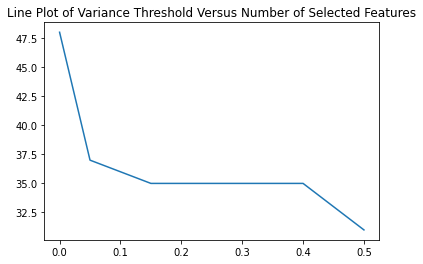

In [13]:
from sklearn.feature_selection import VarianceThreshold
from numpy import arange
import matplotlib.pyplot as plt

df = pd.read_csv(oilDataPath + "oil-spill.csv", header=None)

# split data into data and outputs
X = df.values[:,:-1]
y = df.values[:,-1]

# define thresholds to check
thresholds = arange(0.0, 0.55, 0.05)

# Apply threshold with each transform
results = []
for t in thresholds:
    # define the transform
    transform = VarianceThreshold(threshold=t)
    # transform the input data
    X_sel = transform.fit_transform(X)
    # determine the number of input features
    n_features = X_sel.shape[1]
    print("Threshold : %s, Number of Features : %s"%(t,n_features))
    results.append(n_features)

# let us plot threshold vs features
plt.plot(thresholds,results)
plt.title("Line Plot of Variance Threshold Versus Number of Selected Features")
plt.show()

> We can see that even with a small threshold between 0.15 and 0.4, that a large number of features (14) are removed immediately

#### Identify rows that contain duplicate data

In [14]:
# calculated duplicates
dups = df.duplicated()

# report if there are any duplicates
print(dups.any())

# list all duplicate rows
print(df[dups])

False
Empty DataFrame
Columns: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]
Index: []

[0 rows x 50 columns]


#### Delete rows that contain duplicate data

In [15]:
# delete duplicate rows
df.drop_duplicates(inplace=True)
df.reset_index(drop=True,inplace=True)
print(df.shape)

(937, 50)


#### Combining everything

In [16]:
from sklearn.feature_selection import VarianceThreshold
oildf = pd.read_csv(oilDataPath + "oil-spill.csv",header=None)
print(oildf.shape)
uniquePercentages = round((oildf.nunique()/len(oildf))*100,2)
# print(uniquePercentages)
uniqueDel = [i for i,v in enumerate(uniquePercentages) if v<=1]
oildf.drop(uniqueDel,axis=1,inplace=True)
print(oildf.shape)
# divide the dataset
X = oildf.values[:,:-1]
y = oildf.values[:,-1]
transform = VarianceThreshold(threshold=0.4)
X_sel = transform.fit_transform(X)
print(X_sel.shape)
X_sel = pd.DataFrame(X_sel)
X_sel.drop_duplicates(inplace=True)
print(X_sel.shape)

(937, 50)
(937, 39)
(937, 28)
(937, 28)


<h1 style=text-align:left;color:lime;font:bold> Outlier identification and Removal </h1>